In [1]:
import scanpy as sc
import anndata as ad
from Benchmark import monocle_prepare

In [2]:
import torch
if torch.cuda.is_available():
    !nvidia-smi
else:
    print("GPU is not available")

GPU is not available


In [22]:
ref = sc.read_h5ad("../Data/scdata/Simulation/adata1.h5ad")
adata1 = sc.read_h5ad("../Data/scdata/Simulation/adata2.h5ad")
adata2 = sc.read_h5ad("../Data/scdata/Simulation/adata3.h5ad")
adata = ad.concat([ref, adata1, adata2], label="batch")

/usr/local/anaconda3/envs/mamba/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/envs/mamba/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/envs/mamba/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/envs/mamba/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/usr/local/anaconda3/envs/mamba/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.6 anndata==0.10.3 umap==0.5.5 numpy==1.22.4 scipy==1.11.1 pandas==1.5.2 scikit-learn==1.3.2 statsmodels==0.14.1 igraph==0.10.4 louvain==0.7.0 pynndescent==0.5.11
Found 2 genes with zero variance.


/usr/local/anaconda3/envs/mamba/lib/python3.9/site-packages/scanpy/preprocessing/_combat.py:340: RuntimeWarning: invalid value encountered in true_divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()
/usr/local/anaconda3/envs/mamba/lib/python3.9/site-packages/scanpy/preprocessing/_combat.py:340: RuntimeWarning: divide by zero encountered in true_divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


/usr/local/anaconda3/envs/mamba/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/anaconda3/envs/mamba/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


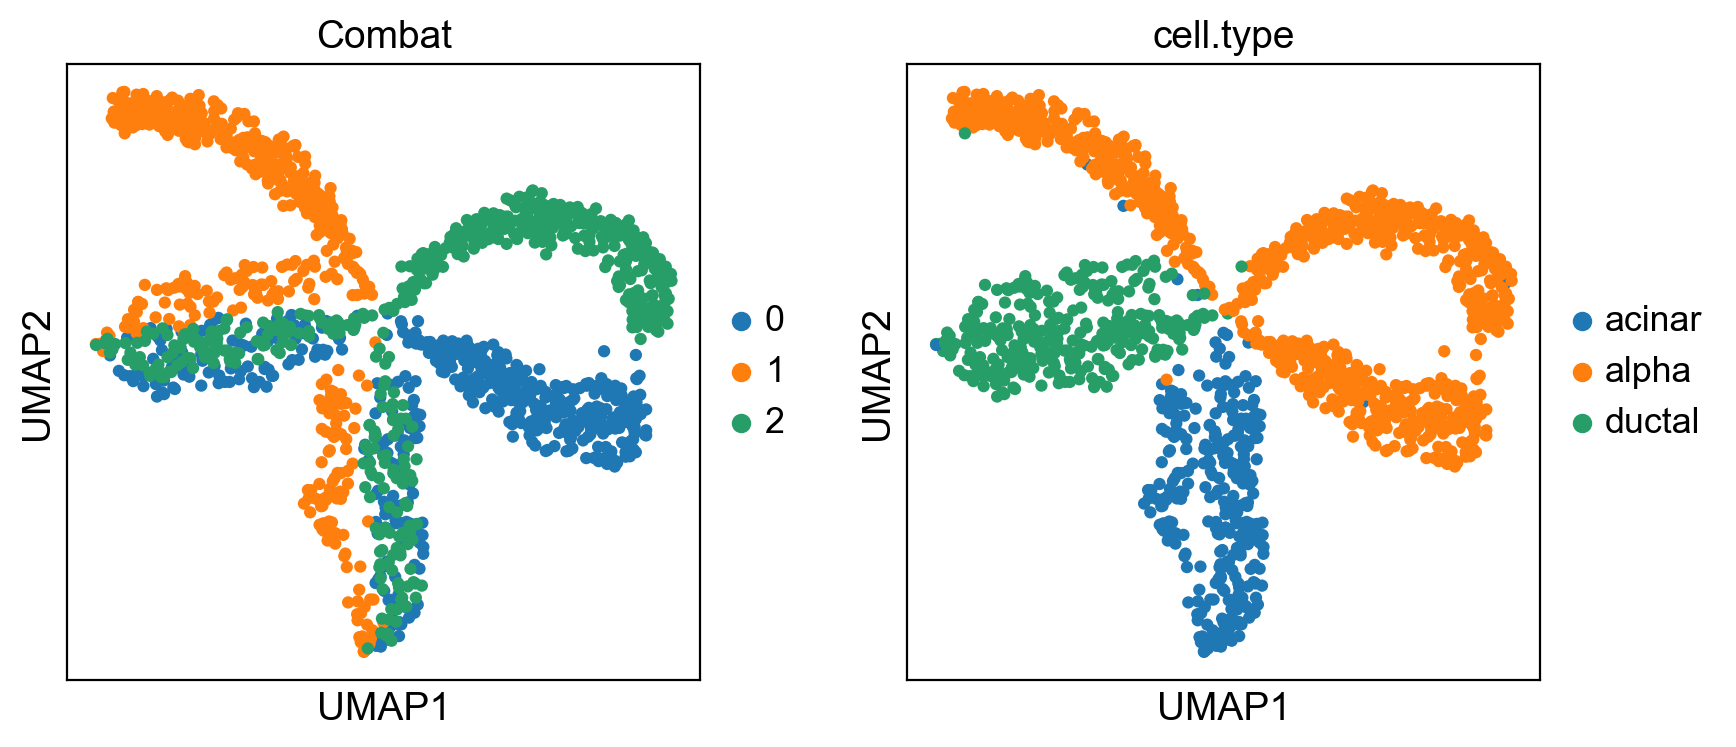

In [4]:
sc.settings.verbosity = 1
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.tl.pca(adata)
sc.pp.combat(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["batch", "cell.type"], title="Combat")

In [5]:
monocle_prepare(adata, random_state=42, save_dir = "/volume1/home/kliu/Data/temp")

Use computed Umap


/volume1/home/kliu/.local/lib/python3.9/site-packages/anndata2ri/py2r.py:45: UserWarning: Duplicated obs_names: Index(['Cell1', 'Cell1', 'Cell1', 'Cell1', 'Cell1', 'Cell1', 'Cell1', 'Cell1',
       'Cell1', 'Cell10',
       ...
       'Cell98', 'Cell98', 'Cell98', 'Cell99', 'Cell99', 'Cell99', 'Cell99',
       'Cell99', 'Cell99', 'Cell99'],
      dtype='object', name='index', length=1517)
  warn(f'Duplicated {name}: {idx[idx.duplicated(False)].sort_values()}')


In [6]:
adata.obs["batch"]

index
Cell1      0
Cell2      0
Cell3      0
Cell4      0
Cell5      0
          ..
Cell113    2
Cell114    2
Cell115    2
Cell116    2
Cell117    2
Name: batch, Length: 1533, dtype: category
Categories (3, object): ['0', '1', '2']

In [21]:
adata_temp = ad.concat([adata1, adata2], label="batch")
adata1 = adata_temp[adata_temp.obs["batch"] == 0]
adata2 = adata_temp[adata_temp.obs["batch"] == 1]
adata = ad.concat([adata1, adata2, ref], label="batch")
adata

/usr/local/anaconda3/envs/mamba/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/envs/mamba/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 512 × 2000
    obs: 'X', 'cell.type', 'batch'

In [19]:
len(adata.obs["batch"].unique())

3

In [20]:
adata1

View of AnnData object with n_obs × n_vars = 476 × 2000
    obs: 'X', 'cell.type', 'batch'

In [25]:
num_batch = len(adata.obs["batch"].unique())
input_list = []
for i in range(num_batch):
    input_list.append(adata[adata.obs["batch"] == f"{i}"])

In [30]:
[*input_list]

[View of AnnData object with n_obs × n_vars = 512 × 2000
     obs: 'X', 'cell.type', 'batch',
 View of AnnData object with n_obs × n_vars = 476 × 2000
     obs: 'X', 'cell.type', 'batch',
 View of AnnData object with n_obs × n_vars = 545 × 2000
     obs: 'X', 'cell.type', 'batch']